In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.chdir("/Users/gilgu/OneDrive/Escritorio")
df = pd.read_excel("Mexico_GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


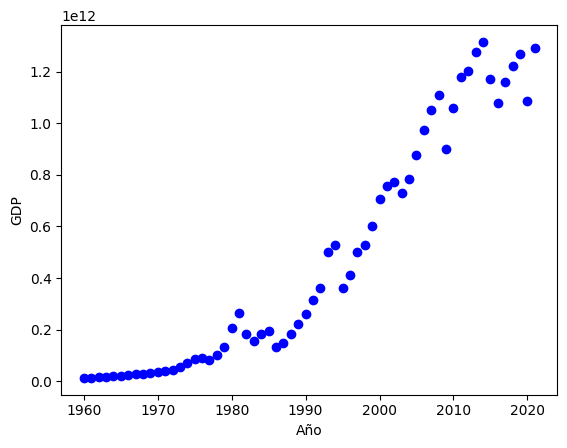

In [3]:
plt.scatter(df.Periodo, df.GDP, color='blue')
plt.xlabel("Año")
plt.ylabel("GDP")
plt.show()

In [4]:
x = np.asanyarray(df['Periodo'])
y = np.asanyarray(df['GDP'])

# Normalizamos nuestros datos:

In [5]:
MaxPeriodo = max(x)
MaxGDP = max(y)

xdata = x/max(x)
ydata = y/max(y)

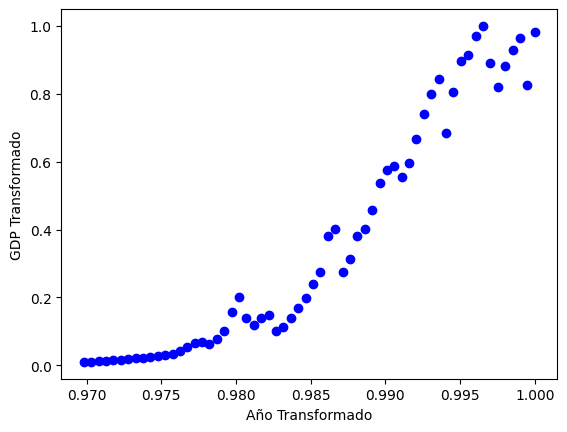

In [7]:
plt.scatter(xdata, ydata, color='blue')
plt.xlabel("Año Transformado")
plt.ylabel("GDP Transformado")
plt.show()

# Datos para prueba.

In [8]:
msk = np.random.rand(len(x)) <= 0.8
msk

array([False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [10]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(Beta_1 * (x - Beta_2)))
    return y

In [11]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, train_x, train_y)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = -275.802976, beta_2 = 0.989177


In [12]:
y_hat = sigmoid(test_x, *popt)
y_hat

array([0.00477476, 0.00626378, 0.01612057, 0.03582607, 0.06027207,
       0.11260753, 0.16043795, 0.22346838, 0.46162093, 0.5967774 ,
       0.79369365])

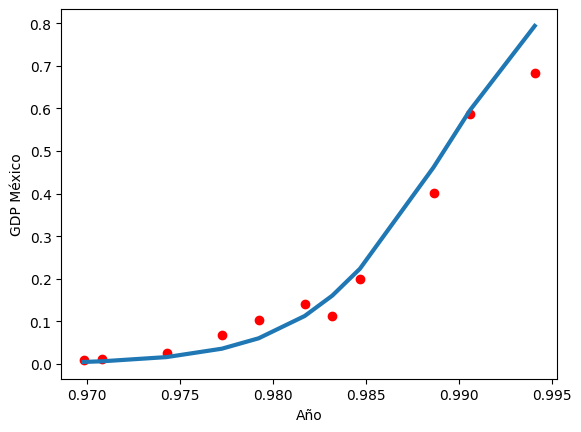

In [13]:
plt.plot(test_x, test_y, 'ro', label = 'Datos')
plt.plot(test_x, y_hat, linewidth=3.0, label='fit')
plt.ylabel('GDP México')
plt.xlabel('Año')
plt.show()

# Evaluación del error

In [ ]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y)) ** 2)
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat - test_y))

In [17]:
MaxPeriodo

2021

In [18]:
MaxGDP

1315351183524.544

In [19]:
z = 2022 / MaxPeriodo
GDP = sigmoid(z, *popt) * MaxGDP

In [20]:
GDP

1259801241438.7866